# Working with `auxi`'s Ideal Gas Models

## Purpose
The purpose of this example is to introduce and demonstrate the `idealgas` model classes in `auxi`'s material physical property tools package.

## Background
The `idealgas` models provides you with the tools to calculate certian material physical property of ideal gases by making use of the gas states which includes the temperature, pressure and molar compostion. It is important to keep in mind that a gas are ideal gas at high temperatures and low pressures. 

## Items Covered
The following items in `auxi` are discussed and demonstrated in this example:
* `auxi.tools.materialphysicalproperties.idealgas`

## Example Scope
In this example we will address the following aspects:
1. Using the `BetaT` model
2. Using the `RhoT` model
3. Using the `RhoTP` model
4. Using the `RhoTPx` model


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Demonstrations

### Importing the `idealgas` Models
Before you can use that `idealgas` models, you need to import it from `auxi`.

In [2]:
from auxi.tools.materialphysicalproperties import idealgas 

You are now ready to use the `idealgas` models, but for this demonstration we will be importing it model indivisually when being demonstated. 

# 1. Using the `BetaT` model
A model that describes the variation in the thermal expansion coefficient of an ideal gas as a function of temperature.

###  Calculating `BetaT` for a Single Temperature
As basic example lets calculated the thermal expansion coefficient at a single temperature:

In [3]:
from auxi.tools.materialphysicalproperties.idealgas import BetaT

# create a model object
betaT = BetaT()

# define the state of the gas
T = 500

# calculate the gas density 
β = betaT.calculate(T=T)
print ("β =", β, betaT.units)

β = 0.002 1/K


### Calculating `BetaT` for Mutliple temperatures
Now to show the potensial of this model lets calculated at mutliple temperatures and plot it.

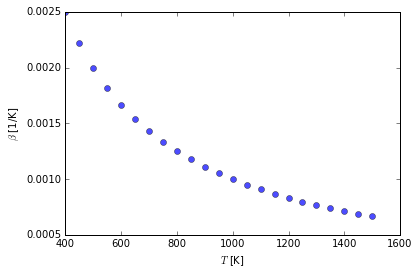

In [4]:
from auxi.tools.materialphysicalproperties.idealgas import BetaT

# create a model object
betaT = BetaT()

# calculate the gas density
Ts = list(range(400, 1550, 50))
beta = [betaT(T=T) for T in Ts]

# plot a graph
plt.plot(Ts, beta, "bo", alpha = 0.7)
plt.xlabel('$T$ [K]')
plt.ylabel('$%s$ [%s]' % (betaT.display_symbol, betaT.units))
plt.show()

# 2. Using the RhoT model
A model that describes the variation in density of an ideal gas as a function of temperature.

### Calculating `RhoT` for a Single temperature
As basic example lets calculated the density at a single temperature:

In [5]:
from auxi.tools.chemistry.stoichiometry import molar_mass as mm
from auxi.tools.materialphysicalproperties.idealgas import RhoT

# molar mass of CO2 gas
mm_CO2 = mm("CO2")

# create a model object
rhoT = RhoT(molar_mass=mm_CO2, P=101325)

# define the state of the gas
T = 500

# calculate the gas density
rho = rhoT.calculate(T=T)
print(rhoT.symbol, "=", rho, rhoT.units)

rho = 1.0726520931522439 kg/m3


### Calculating `RhoT` for Mutliple temperatures
Now to show the potensial of this model lets calculated at mutliple temperatures and plot it.

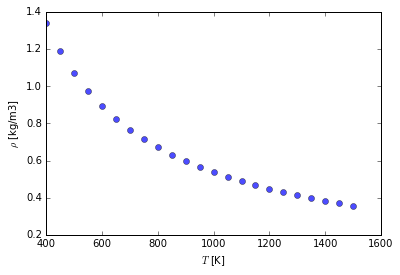

In [6]:
from auxi.tools.materialphysicalproperties.idealgas import RhoT

# molar mass of CO2 gas
mm_CO2 = mm("CO2")

# create a model object
rhoT = RhoT(mm_CO2, P=101325)

# calculate the gas density
Ts = list(range(400, 1550, 50))
rho = [rhoT(T=T) for T in Ts]

# plot a graph
plt.plot(Ts, rho, "bo", alpha = 0.7)
plt.xlabel('$T$ [K]')
plt.ylabel('$%s$ [%s]' % (rhoT.display_symbol, rhoT.units))
plt.show()

# 3. Using the RhoTP model
A model that describes the variation in density of an ideal gas as a function of temperature and pressure.


### Calculating `RhoTP` for a Single Temperature and Pressure
As basic example lets calculated the density at a single temperature and pressure:

In [42]:
from auxi.tools.materialphysicalproperties.idealgas import RhoTP

# molar mass of CO2 gas
mm_CO2 = mm("CO2")

# create a model object
rhoTP = RhoTP(mm_CO2)

# define the state of the gas
T = 500
P = 101325

# calculate the gas density
rho = rhoTP.calculate(T=T,P=P)
print(rhoTP.symbol, "=", rho, rhoTP.units)

rho = 1.0726520931522439 kg/m3


### Calculating `RhoTP` for Mutliple Pressures
Now to show the potensial of this model lets calculated at mutliple pressures and plot it.

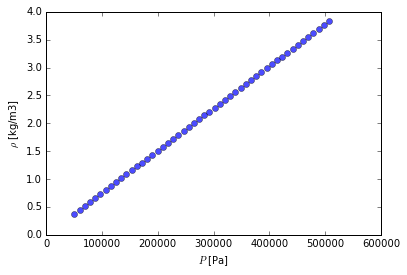

In [43]:
from auxi.tools.materialphysicalproperties.idealgas import RhoTP

# molar mass of CO2 gas
mm_CO2 = mm("CO2")

# create a model object
rhoT = RhoTP(mm_CO2)

# define the state of the gas
T = 700

# calculate the gas density
Ps = np.linspace(0.5*101325, 5*101325)
rho = [rhoTP(T=T, P=P) for P in Ps]

# plot a graph
plt.plot(Ps, rho, "bo", alpha = 0.7)
plt.xlabel('$P$ [Pa]')
plt.ylabel('$%s$ [%s]' % (rhoTP.display_symbol, rhoTP.units))
plt.show()

# 4. RhoTPx model
A model that describes the variation in density of an ideal gas as a function of temperature, pressure, and molar composition.

### Calculating `RhoTP` for a Single Temperature, Pressure and Molar Composition 
As basic example lets calculated the density at a single temperature and pressure for constant molar compostion for a mixture of two gases in molar fractions:

In [44]:
from auxi.tools.materialphysicalproperties.idealgas import RhoTPx

# create a model object
rhoTPx = RhoTPx()

# define the state of the gas
T = 700.0
P = 101325.0
x = {'H2':0.5, 'Ar':0.5}

# calculate the gas density
rho = rhoTPx(T=700, P=101000, x=x)
print(rhoTPx.symbol, "=", rho, rhoTPx.units)

rho = 0.364111852767962 kg/m3


### Calculating `RhoTP` for a Molar Composition of Two Gases
As basic example lets calculated the density at a single temperature and pressure for constant molar compostion for a mixture of two gases in molar fractions:

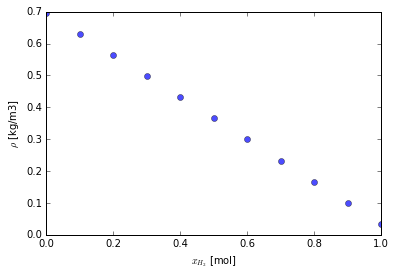

In [45]:
from auxi.tools.materialphysicalproperties.idealgas import RhoTPx

# create a model object
rhoTPx = RhoTPx()

# calculate density as a function of composition for a binary Ar-H2 gas mixture
xs_h2 = np.arange(0,1.1,0.1)
rho = [rhoTPx(T=700, P=101325 ,x={'Ar':1-x, 'H2':x}) for x in xs_h2]

# plot a graph
plt.plot(Xs, rho, "bo", alpha = 0.7)
plt.xlim((0,1))
plt.xlabel('$x_{H_2}$ [mol]')
plt.ylabel('$%s$ [%s]' % (rhoTPx.display_symbol, rhoTPx.units))
plt.show()